In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def Galton_Watson1(n, theta, y, ys, z):
    for gen in range(n):  #loop over the generations
            ys[gen,sim] = y
            w = np.array([0,0,0])
            for c in range(y): #loop of the cell
                r = np.random.random()
                if r < theta[0]:
                    w[0]+=1 # count deaths (a0) in a single generation
                    z[0]+=1 # count deaths (a0)in population history
                elif r >= theta[0] and r < np.sum(theta[:2]): 
                    w[1]+=1 # count inactivation (a1) in a single generation
                    z[1]+=1 # count inactivation (a1) in population history
                else: 
                    w[2]+=1 # count division (a2) in a single generation
                    z[2]+=1 # count division (a2)in population history
            y = y -w[0] + w[2] #update the population
    return y, ys, z

[0.09010766 0.22398007 0.68591227]
[1 0 0]


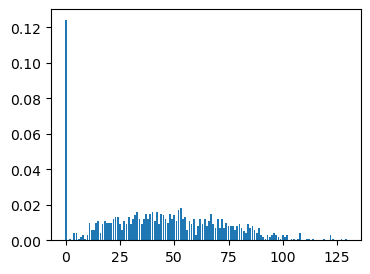

In [17]:
# Parameters
n = 8        # Number of generations
m = 1000       # Number of samples
steps =100# Number of EM steps

# Initial guesses for theta
theta = np.array([0.33333, 0.33333, 0.33334], dtype=np.float64)
θs = np.ones((len(theta),steps+1)) 
θs[::,0] = theta

#-----------------------------------import data and empirical distribution---------------------------------------------------
data = np.loadtxt('dataGW1/GW1_Y_gen8_num_sim1000_θ[0.1 0.2 0.7]_zk[11539 22996 80417]_yi1.txt')
data = data[-1] #skip the starting points (are not like the other data)
μ = np.zeros(2**n+1)
values, freqs = np.unique(data, return_counts=True)   #calculate the empirical distribution 
values = values.astype(int)
μ[values] = freqs/np.sum(freqs) #empirical distribution
fig = plt.figure(figsize=(4,3))
plt.bar(values, freqs/np.sum(freqs))
#----------------------------------------------------------------------------------------------------------------------------
ys = np.zeros((n,m))
#loop over the EM steps
for step in range(1,steps+1):
    
    q =np.zeros(3) #estimators
    τ = np.ones(2**n+1, int) #count steps between identical observations/states

    #generate m indipendend samples using 1-type Galton-Watson
    for sim in range(0,m):  #loop over the generations
        y = 1 #initial population (num of cells)
        z = np.array([0,0,0]) #hidden variable (num of deaths, inactivations and divisions)

        y, ys, z = Galton_Watson1(n, theta, y, ys,z) #Galton-Watson
          
        #print("deaths, inactivations, divisions: ", z)
        #q formula 
        q = q + (1.0/(sim+1)) * (z * τ[y] * μ[y] - q)   

        τ+=1 
        τ[y] = 1
    
    # Update theta based on q
    r = np.sum(q)
    theta = q / r
    θs[::,step] = theta

print(theta)
print(z)

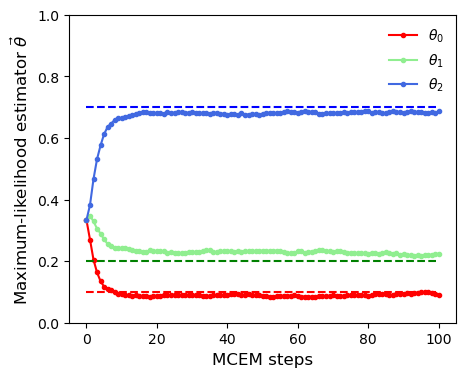

In [18]:
#true
a0_tr = 0.1*np.ones(steps+1)
a1_tr = 0.2*np.ones(steps+1)
a2_tr = 0.7*np.ones(steps+1)


fig = plt.figure(figsize=(5,4))
plt.plot(θs[0,::], ".-", color="red", label="$θ_0$");
plt.plot(θs[1,::], ".-", color="lightgreen", label="$θ_1$");
plt.plot(θs[2,::], ".-", color="royalblue", label="$θ_2$");


plt.plot(a0_tr, "--", color="red")
plt.plot(a1_tr, "--", color="green")
plt.plot(a2_tr, "--", color="blue")
plt.ylim(0,1)
plt.xlabel("MCEM steps", fontsize=12)
plt.ylabel(r"Maximum-likelihood estimator $\vec{θ}$",fontsize=12)
plt.legend(frameon=False)